### EDA & Data Preprocessing on Google App Store Rating

#### 1. Import required libraries and read the dataset.


In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [35]:
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv(r"F:\Python\Projects\Project 4\Apps_data+(1).csv")

#### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features

In [5]:
df.shape

(10841, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


#### 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building

In [9]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [10]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#### 4. Check if there are any duplicate records in the dataset? if any drop them.

In [14]:
duplicate=df[df.duplicated()]

In [15]:
duplicate.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up


In [16]:
if not duplicate.empty:

    df = df.drop_duplicates()
    print(df.head())
else:
    print("No Duplicate Records Found.")

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [17]:
dup=df[df.duplicated()]

In [18]:
dup

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#### 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [19]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [20]:
df=df[df['Category']!= '1.9']

In [21]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

#### 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [22]:
df['Rating'].isnull().sum()

1465

In [23]:
df['Rating'].dropna()

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 8892, dtype: float64

In [29]:
df = df.dropna(subset=['Rating'])

In [30]:
df['Rating'].isnull().sum()

0

In [31]:
df['Rating_category'] = pd.cut(df['Rating'], bins=[-float('inf'), 3.5, float('inf')], labels=['Low', 'High'])

In [34]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


#### 7. Check the distribution of the newly created column 'Rating_category' and comment on the distributio

In [37]:
rating_category_distribution=df['Rating_category'].value_counts()

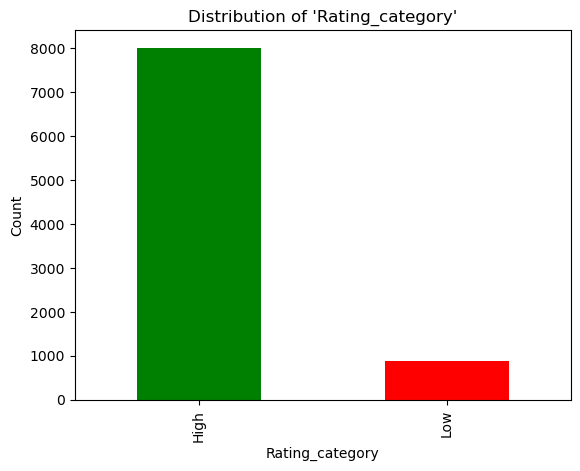

In [38]:
rating_category_distribution.plot(kind='bar', color=['green', 'red'])
plt.title("Distribution of 'Rating_category'")
plt.xlabel("Rating_category")
plt.ylabel("Count")
plt.show()

##### The distribution of the 'Rating_category' is imbalanced, with a larger proportion of apps falling into the 'High' rating category.The imbalance suggests that a majority of the apps in the dataset have ratings greater than 3.5,indicating a positive bias towards higher ratings.

#### 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [40]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8892 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   App              8892 non-null   object  
 1   Category         8892 non-null   object  
 2   Rating           8892 non-null   float64 
 3   Reviews          8892 non-null   int64   
 4   Size             8892 non-null   object  
 5   Installs         8892 non-null   object  
 6   Type             8892 non-null   object  
 7   Price            8892 non-null   object  
 8   Content Rating   8892 non-null   object  
 9   Genres           8892 non-null   object  
 10  Last Updated     8892 non-null   object  
 11  Current Ver      8888 non-null   object  
 12  Android Ver      8890 non-null   object  
 13  Rating_category  8892 non-null   category
dtypes: category(1), float64(1), int64(1), object(11)
memory usage: 981.4+ KB


In [42]:
from scipy.stats import zscore

In [43]:
z_scores = zscore(df['Reviews'])

In [45]:
z_threshold = 3

outliers = np.where(np.abs(z_scores) > z_threshold)[0]
print("Outliers:")
print(df.iloc[outliers])

Outliers:
                                                    App       Category  \
335            Messenger – Text and Video Chat for Free  COMMUNICATION   
336                                  WhatsApp Messenger  COMMUNICATION   
338                        Google Chrome: Fast & Secure  COMMUNICATION   
342                                     Viber Messenger  COMMUNICATION   
378         UC Browser - Fast Download Private & Secure  COMMUNICATION   
...                                                 ...            ...   
6449                        BBM - Free Calls & Messages  COMMUNICATION   
7536  Security Master - Antivirus, VPN, AppLock, Boo...          TOOLS   
7937                                     Shadow Fight 2           GAME   
8894  Cache Cleaner-DU Speed Booster (booster & clea...          TOOLS   
8896  DU Battery Saver - Battery Charger & Battery Life          TOOLS   

      Rating   Reviews                Size        Installs  Type Price  \
335      4.0  56642847  Var

In [46]:
df['Reviews_log'] = np.log1p(df['Reviews'])

In [47]:
df['Reviews_log'].head()

0     5.075174
1     6.875232
2    11.379520
3    12.281389
4     6.875232
Name: Reviews_log, dtype: float64

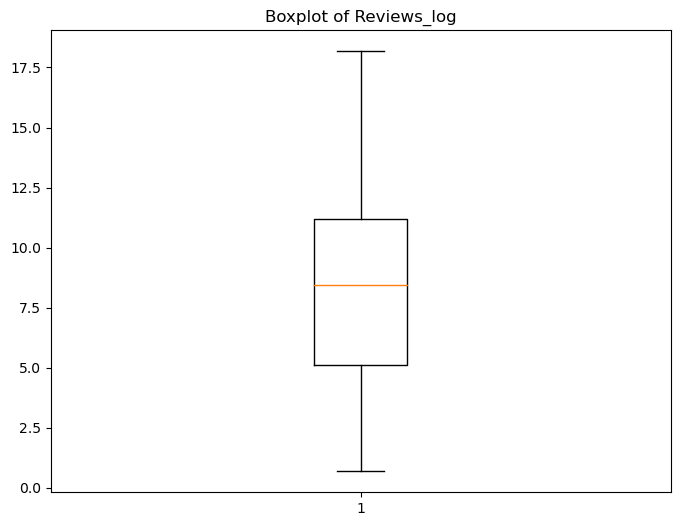

In [48]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Reviews_log'])
plt.title('Boxplot of Reviews_log')
plt.show()

#### 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [56]:
df['Size'] = df['Size'].replace({'M': '1000000', 'K': '1000'}, regex=True)

# Replace 'Varies with device' with NaN
df['Size'] = df['Size'].replace('Varies with device', np.nan)

# Convert the 'Size' column to numeric
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

# Drop rows with NaN in the 'Size' column
df = df.dropna(subset=['Size'])

In [57]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category,Reviews_log
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,1.910000e+08,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High,5.075174
1,Coloring book moana,ART_AND_DESIGN,3.9,967,1.410000e+08,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High,6.875232
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.710000e+00,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High,11.379520
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,2.510000e+08,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High,12.281389
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.810000e+00,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High,6.875232


#### 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type

In [58]:
df['Installs'] = df['Installs'].str.replace('[^\d]', '', regex=True).astype(int)

In [60]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category,Reviews_log
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,1.910000e+08,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High,5.075174
1,Coloring book moana,ART_AND_DESIGN,3.9,967,1.410000e+08,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High,6.875232
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.710000e+00,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High,11.379520
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,2.510000e+08,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High,12.281389
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.810000e+00,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High,6.875232


#### 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [61]:
df['Price'] = df['Price'].replace('[^\d.]', '', regex=True).astype(float)


In [62]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category,Reviews_log
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,1.910000e+08,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High,5.075174
1,Coloring book moana,ART_AND_DESIGN,3.9,967,1.410000e+08,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High,6.875232
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.710000e+00,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High,11.379520
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,2.510000e+08,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High,12.281389
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.810000e+00,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High,6.875232


#### 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [63]:
columnsdrop = ['Rating', 'App', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


df = df.drop(columns=columnsdrop)


In [64]:
df.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category,Reviews_log
0,ART_AND_DESIGN,159,1.910000e+08,10000,Free,0.0,Everyone,High,5.075174
1,ART_AND_DESIGN,967,1.410000e+08,500000,Free,0.0,Everyone,High,6.875232
2,ART_AND_DESIGN,87510,8.710000e+00,5000000,Free,0.0,Everyone,High,11.379520
3,ART_AND_DESIGN,215644,2.510000e+08,50000000,Free,0.0,Teen,High,12.281389
4,ART_AND_DESIGN,967,2.810000e+00,100000,Free,0.0,Everyone,High,6.875232


#### 13. Encode the categorical columns

In [65]:
df_encoded = pd.get_dummies(df, columns=['Category', 'Type', 'Content Rating', 'Rating_category'])

In [66]:
df_encoded.head()

,Reviews,Size,Installs,Price,Reviews_log,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Rating_category_Low,Rating_category_High
0,159,1.910000e+08,10000,0.0,5.075174,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1,967,1.410000e+08,500000,0.0,6.875232,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,87510,8.710000e+00,5000000,0.0,11.379520,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,215644,2.510000e+08,50000000,0.0,12.281389,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,967,2.810000e+00,100000,0.0,6.875232,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


#### 14.Segregate the target and independent features (Hint: Use Rating_category as the target)


In [67]:
X = df_encoded.drop(columns=['Rating_category_High', 'Rating_category_Low'])  
y = df_encoded[['Rating_category_High', 'Rating_category_Low']]

#### 15. Split the dataset into train and test

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
X_train.head()

,Reviews,Size,Installs,Price,Reviews_log,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
5990,14,111000000.0,1000,0.00,2.708050,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
6547,33661,601000000.0,100000,2.99,10.424125,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
9362,20977,261000000.0,1000000,0.00,9.951230,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
6300,212067,481000000.0,10000000,0.00,12.264662,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
7682,70,141000000.0,1000,0.00,4.262680,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0


In [72]:
y_train.head()

,Rating_category_High,Rating_category_Low
5990,0,1
6547,1,0
9362,1,0
6300,1,0
7682,1,0


In [73]:
X_test.head()

,Reviews,Size,Installs,Price,Reviews_log,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
2705,9975,1.810000e+08,1000000,0.0,9.207937,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
735,423,2.110000e+08,100000,0.0,6.049733,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
9801,513,2.010000e+00,50000,0.0,6.242223,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8683,10786,9.410000e+00,500000,0.0,9.286097,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
10306,15,2.610000e+08,1000,0.0,2.772589,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [74]:
y_test.head()

,Rating_category_High,Rating_category_Low
2705,1,0
735,1,0
9801,1,0
8683,1,0
10306,1,0


#### 16. Standardize the data, so that the values are within a particular range

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
X_train_scaled

array([[-0.15597866, -0.42018979, -0.17116942, ..., -0.21970908,
        -0.35635708, -0.0132083 ],
       [-0.13796742,  1.52814103, -0.16893915, ..., -0.21970908,
        -0.35635708, -0.0132083 ],
       [-0.14475717,  0.17623801, -0.14866398, ..., -0.21970908,
        -0.35635708, -0.0132083 ],
       ...,
       [-0.15595725, -0.86154635, -0.17096667, ..., -0.21970908,
        -0.35635708, -0.0132083 ],
       [-0.15239161, -0.86154633, -0.15992796, ...,  4.55147329,
        -0.35635708, -0.0132083 ],
       [-0.15193233, -0.14185682, -0.14866398, ..., -0.21970908,
        -0.35635708, -0.0132083 ]])

In [82]:
X_test_scaled

array([[-0.15064654, -0.14185682, -0.14866398, ..., -0.21970908,
        -0.35635708, -0.0132083 ],
       [-0.15575972, -0.02257126, -0.16893915, ..., -0.21970908,
        -0.35635708, -0.0132083 ],
       [-0.15571154, -0.86154636, -0.17006555, ..., -0.21970908,
        -0.35635708, -0.0132083 ],
       ...,
       [-0.1534938 , -0.06233311, -0.16893915, ..., -0.21970908,
        -0.35635708, -0.0132083 ],
       [ 0.77335064, -0.30090423,  0.05408768, ...,  4.55147329,
        -0.35635708, -0.0132083 ],
       [-0.14138585, -0.86154633, -0.14866398, ..., -0.21970908,
         2.80617409, -0.0132083 ]])

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have X_train_scaled, X_test_scaled, y_train, and y_test 

# Initialize the Linear Regression model
linear_reg_model = LinearRegression()

linear_reg_model.fit(X_train_scaled, y_train)


y_pred = linear_reg_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)

In [84]:
mse

0.09138017862725574

In [85]:
y_pred

array([[ 0.9519973 ,  0.0480027 ],
       [ 0.90800845,  0.09199155],
       [ 0.8143048 ,  0.1856952 ],
       ...,
       [ 0.97670822,  0.02329178],
       [ 1.04970916, -0.04970916],
       [ 0.98824498,  0.01175502]])

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have X_train_scaled, X_test_scaled, y_train, and y_test

# Initialize the Logistic Regression model
logistic_reg_model = LogisticRegression()

logistic_reg_model.fit(X_train_scaled, y_train['Rating_category_High'])

y_pred = logistic_reg_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test['Rating_category_High'], y_pred)
classification_report_result = classification_report(y_test['Rating_category_High'], y_pred)


C:\Users\Praveen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Praveen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Praveen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
classification_report_result

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       159\n           1       0.89      1.00      0.94      1275\n\n    accuracy                           0.89      1434\n   macro avg       0.44      0.50      0.47      1434\nweighted avg       0.79      0.89      0.84      1434\n'

In [89]:
accuracy

0.8891213389121339

In [90]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)